In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import koreanize_matplotlib
import pandas as pd
from datetime import datetime
from wordcloud import WordCloud
import networkx as nx
from collections import Counter
from itertools import combinations
from konlpy.tag import Okt
import re



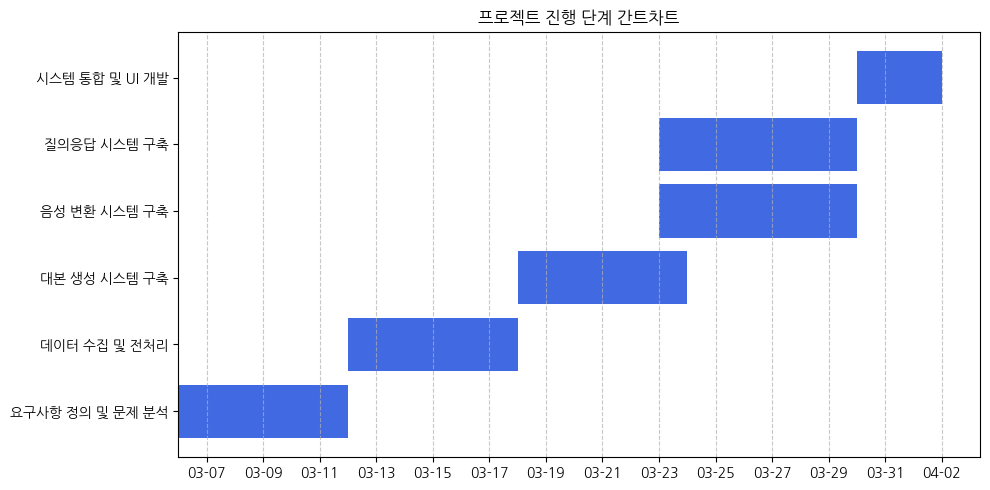

In [22]:
# 6단계 데이터 준비
tasks = [
    ('요구사항 정의 및 문제 분석', '2025-03-06', '2025-03-12'),
    ('데이터 수집 및 전처리', '2025-03-12', '2025-03-18'),
    ('대본 생성 시스템 구축', '2025-03-18', '2025-03-24'),
    ('음성 변환 시스템 구축', '2025-03-23', '2025-03-30'),
    ('질의응답 시스템 구축', '2025-03-23', '2025-03-30'),
    ('시스템 통합 및 UI 개발', '2025-03-30', '2025-04-02'),
]

# 데이터프레임으로 변환
df = pd.DataFrame(tasks, columns=['작업명', '시작일', '종료일'])
df['시작일'] = pd.to_datetime(df['시작일'])
df['종료일'] = pd.to_datetime(df['종료일'])

# 차트 그리기
fig, ax = plt.subplots(figsize=(10, 5))

for idx, row in df.iterrows():
    ax.barh(
        row['작업명'],
        row['종료일'] - row['시작일'],
        left=row['시작일'],
        color='royalblue'
    )

# 날짜 포맷 설정
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=0)

ax.set_title('프로젝트 진행 단계 간트차트')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [17]:
def preprocess_text(text):
    """한글만 남기고 불용어 제거"""
    text = re.sub(r"[^가-힣\s]", "", text)  # 한글 이외 문자 제거
    okt = Okt()
    words = okt.nouns(text)  # 명사 추출
    stopwords = ['대한', '한국', '통일', '선거', '정책']  # 불용어 목록 추가 가능
    words = [word for word in words if word not in stopwords and len(word) > 1]  # 불용어 제거 및 한 글자 단어 제외
    return words

def generate_wordcloud(words):
    """워드클라우드 생성"""
    word_freq = Counter(words)
    wordcloud = WordCloud(
        font_path="malgun.ttf",
        background_color="white",
        width=800,
        height=400,
        colormap="gray"  # 흑백톤 설정
    )
    wordcloud.generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

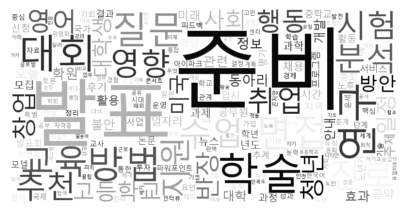

In [19]:
csv_file = "../../data/csv/collection.csv" 
df = pd.read_csv(csv_file, encoding="utf-8-sig")
all_words = []

for title in df["title"]:  # 모든 제목에 대해 전처리
    all_words.extend(preprocess_text(str(title)))

generate_wordcloud(all_words)  # 워드클라우드 실행